# Handling Numerical Missing Data
* Mean
* Median  
* Arbitrary value imputer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [4]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [5]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state=1)

xtrain.shape , xtest.shape


((712, 3), (179, 3))

# mean and median

In [7]:
mean_age  = xtrain['Age'].mean()
median_age = xtrain['Age'].median()

mean_fare = xtrain['Fare'].mean()
median_fare = xtrain['Fare'].median()



In [12]:
xtrain['Age_mean']  = xtrain['Age'].fillna(mean_age)
xtrain['Age_median'] = xtrain['Age'].fillna(median_age)


xtrain['Fare_mean'] = xtrain['Fare'].fillna(mean_fare)
xtrain['Fare_median'] = xtrain['Fare'].fillna(median_fare)

In [13]:
xtrain.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
237,8.0,26.2500,2,8.000000,8.0,26.2500,26.2500
568,NaN,7.2292,0,30.166232,29.0,7.2292,7.2292
465,38.0,7.0500,0,38.000000,38.0,7.0500,7.0500
532,17.0,7.2292,2,17.000000,17.0,7.2292,7.2292
765,51.0,77.9583,1,51.000000,51.0,77.9583,77.9583


In [16]:
print("Original Age variance: ",xtrain['Age'].var())
print("Age variance after mean: ",xtrain['Age_mean'].var() )
print("Age variance after median: ",xtrain['Age_median'].var() )

print("Original Fare variance: ",xtrain['Fare'].var())
print("Fare variance after mean: ",xtrain['Fare_mean'].var() )
print("Fare variance after median: ",xtrain['Fare_median'].var() )

Original Age variance:  220.7125508594779
Age variance after mean:  176.0112747360393
Age variance after median:  176.23102602680237
Original Fare variance:  2179.2211148474044
Fare variance after mean:  2065.81579663453
Fare variance after median:  2080.7804077558935


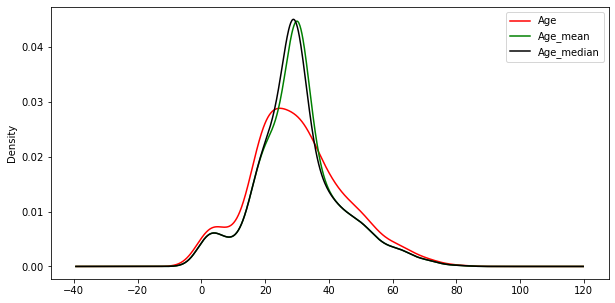

In [32]:
fig  = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

#original age variable
xtrain['Age'].plot(kind='kde',ax = ax,color = 'red',)

#afer imputer mean
xtrain['Age_mean'].plot(kind='kde',ax = ax,color = 'green')

#afer imputer median
xtrain['Age_median'].plot(kind='kde',ax = ax,color = 'black')


# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

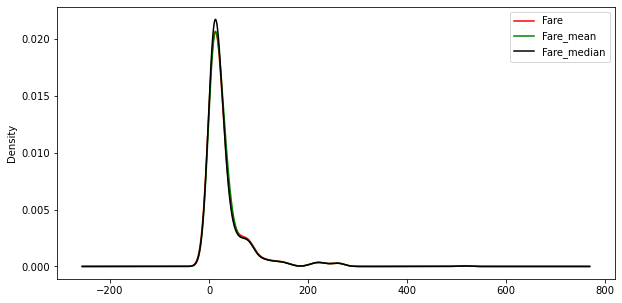

In [33]:
fig  = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

#original age variable
xtrain['Fare'].plot(kind='kde',ax = ax,color = 'red',)

#afer imputer mean
xtrain['Fare_mean'].plot(kind='kde',ax = ax,color = 'green')

#afer imputer median
xtrain['Fare_median'].plot(kind='kde',ax = ax,color = 'black')


# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<AxesSubplot:>

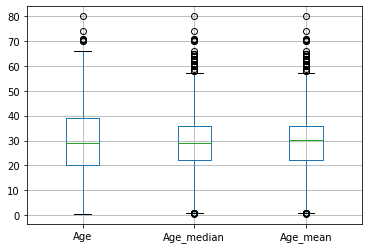

In [34]:
xtrain[['Age', 'Age_median', 'Age_mean']].boxplot()

<AxesSubplot:>

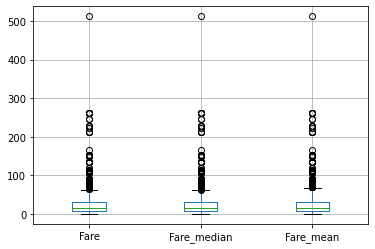

In [35]:
xtrain[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# Using Sklearn

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [40]:

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [42]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [45]:
trf.fit(xtrain)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [46]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [47]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [49]:
xtrain = trf.transform(xtrain)
xtest = trf.transform(xtest)

In [50]:
xtrain

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

# Arbitrary value imputer